In [7]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data_df = pd.read_csv(mouse_drug_data_to_load)
print(mouse_drug_data_df.head())
clinical_trial_data_df = pd.read_csv(clinical_trial_data_to_load)
print(clinical_trial_data_df.head())
# Combine the data into a single dataset
combine_df = pd.merge(mouse_drug_data_df, clinical_trial_data_df, on="Mouse ID", how="outer")
print(combine_df.head())
# Display the data table for preview
combine_df.head()



  Mouse ID      Drug
0     f234  Stelasyn
1     x402  Stelasyn
2     a492  Stelasyn
3     w540  Stelasyn
4     v764  Stelasyn
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0
  Mouse ID      Drug  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     f234  Stelasyn          0           45.000000                 0
1     f234  Stelasyn          5           47.313491                 0
2     f234  Stelasyn         10           47.904324                 0
3     f234  Stelasyn         15           48.735197                 1
4     f234  Stelasyn         20           51.112713                 2


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [12]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
group_tumor_volume = combine_df.groupby(["Drug", "Timepoint"])
print(group_tumor_volume)
group_tumor_volume_mean = group_tumor_volume.mean()
print(group_tumor_volume_mean.head())
# Convert to DataFrame
group_tumor_volume_mean.head()
# Preview DataFrame


                     Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                      
Capomulin 0                   45.000000          0.000000
          5                   44.266086          0.160000
          10                  43.084291          0.320000
          15                  42.064317          0.375000
          20                  40.716325          0.652174


Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                      
Capomulin 0                   45.000000          0.000000
          5                   44.266086          0.160000
          10                  43.084291          0.320000
          15                  42.064317          0.375000
          20                  40.716325          0.652174

In [14]:
group_tumor_volume_mean = group_tumor_volume_mean.reset_index()
group_tumor_volume_mean.head()


,index,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,Capomulin,0,45.000000,0.000000
1,1,Capomulin,5,44.266086,0.160000
2,2,Capomulin,10,43.084291,0.320000
3,3,Capomulin,15,42.064317,0.375000
4,4,Capomulin,20,40.716325,0.652174


In [28]:
group_tumor_volume_mean = group_tumor_volume_mean.drop(columns=["Metastatic Sites"])
group_tumor_volume_mean.head()

,index,Drug,Timepoint,Tumor Volume (mm3)
0,0,Capomulin,0,45.000000
1,1,Capomulin,5,44.266086
2,2,Capomulin,10,43.084291
3,3,Capomulin,15,42.064317
4,4,Capomulin,20,40.716325


In [35]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_error = group_tumor_volume.sem()
standard_error.head()
# Convert to DataFrame

# Preview DataFrame
#standard_error_df = standard_error
#standard_error_df

Metastatic Sites  Mouse ID  Tumor Volume (mm3)
Drug      Timepoint                                                
Capomulin 0                  0.000000       NaN            0.000000
          5                  0.074833       NaN            0.448593
          10                 0.125433       NaN            0.702684
          15                 0.132048       NaN            0.838617
          20                 0.161621       NaN            0.909731

In [37]:
standard_error_df = standard_error
standard_error_df.head()

Metastatic Sites  Mouse ID  Tumor Volume (mm3)
Drug      Timepoint                                                
Capomulin 0                  0.000000       NaN            0.000000
          5                  0.074833       NaN            0.448593
          10                 0.125433       NaN            0.702684
          15                 0.132048       NaN            0.838617
          20                 0.161621       NaN            0.909731

In [39]:
standard_error_df = standard_error_df.reset_index()
standard_error_df.head()

,index,Drug,Timepoint,Metastatic Sites,Mouse ID,Tumor Volume (mm3)
0,0,Capomulin,0,0.000000,NaN,0.000000
1,1,Capomulin,5,0.074833,NaN,0.448593
2,2,Capomulin,10,0.125433,NaN,0.702684
3,3,Capomulin,15,0.132048,NaN,0.838617
4,4,Capomulin,20,0.161621,NaN,0.909731


In [40]:
standard_error_df = standard_error_df.drop(columns=["Metastatic Sites", "Mouse ID"])
standard_error_df.head()

,index,Drug,Timepoint,Tumor Volume (mm3)
0,0,Capomulin,0,0.000000
1,1,Capomulin,5,0.448593
2,2,Capomulin,10,0.702684
3,3,Capomulin,15,0.838617
4,4,Capomulin,20,0.909731


In [41]:
# Minor Data Munging to Re-Format the Data Frames
reformat = group_tumor_volume_mean.pivot_table(index=["Timepoint"], columns=["Drug"], values="Tumor Volume (mm3)")
reformat
# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [42]:
standard_reformat_error = standard_error_df.pivot_table(index=["Timepoint"], columns=["Drug"], values="Tumor Volume (mm3)")
standard_reformat_error

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


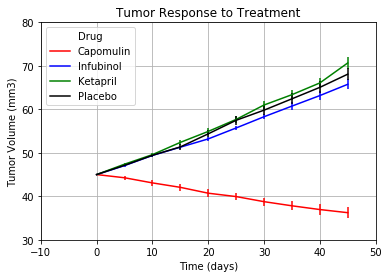

In [54]:
# Generate the Plot (with Error Bars)
reformat[["Capomulin", "Infubinol", "Ketapril", "Placebo"]].plot(yerr = standard_reformat_error, color = ["r", "b", "g", "k"])
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(-10, 50)
plt.ylim(30, 80)
plt.grid()
# Save the Figure
plt.savefig("Tumor_Response_to_Treatment.png")


In [53]:
# Show the Figure
plt.show()


<Figure size 432x288 with 0 Axes>

## Metastatic Response to Treatment

In [19]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [20]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [21]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [22]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


## Survival Rates

In [23]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [24]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [25]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [26]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [27]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

NameError: name 'fig' is not defined